Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mon Sep  8 19:49:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             45W /  400W |       0MiB /  40960MiB |      0%      Default |
|          

Saving BEH-3.png to BEH-3.png

image 1/1 /content/BEH-3.png: 512x512 1 optic_disc, 1 optic_cup, 9.8ms
Speed: 1.5ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 512)


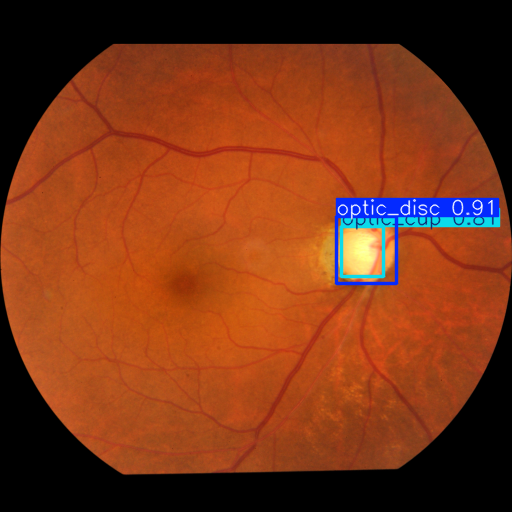

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


!nvidia-smi


!pip install ultralytics


!cp /content/drive/MyDrive/yolo_dataset_clean.zip /content/
!unzip -q yolo_dataset_clean.zip
!ls -la yolo_dataset_clean/


import os
print("✅ Dataset structure:")
print(f"  Train images: {len(os.listdir('yolo_dataset_clean/images/train'))}")
print(f"  Val images: {len(os.listdir('yolo_dataset_clean/images/val'))}")
print(f"  Train labels: {len(os.listdir('yolo_dataset_clean/labels/train'))}")
print(f"  Val labels: {len(os.listdir('yolo_dataset_clean/labels/val'))}")


from ultralytics import YOLO

# Load pretrained model
model = YOLO('yolov8m.pt')  # medium model for better accuracy

# Train
results = model.train(
    data='yolo_dataset_clean/data.yaml',
    epochs=100,
    imgsz=512,
    batch=16,
    patience=20,
    save=True,
    project='/content/drive/MyDrive/glaucoma_project',
    name='glaucoma_model_v1',
    device=0,
    verbose=True
)


print("\n✅ Training complete!")
print("📁 Model saved at: /content/drive/MyDrive/glaucoma_project/glaucoma_model_v1/weights/best.pt")

# Show validation metrics
!yolo detect val model=/content/drive/MyDrive/glaucoma_project/glaucoma_model_v1/weights/best.pt data=yolo_dataset_clean/data.yaml


from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

print("Upload a fundus image to test:")
uploaded = files.upload()
test_image = list(uploaded.keys())[0]


model = YOLO('/content/drive/MyDrive/glaucoma_project/glaucoma_model_v1/weights/best.pt')
results = model(test_image)


results[0].show()

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/glaucoma_project/glaucoma_model_v1/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>